In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


from sklearn import datasets, neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
file = "data/data_players_2019.csv"
# load dataset into Pandas DataFrame

all = pd.read_csv(file)
all

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Fls,Fld.2,Off.1,PKwon,PKcon,OG.1,Recov,AerialWon,AerialLost,AerialWon%
0,1,Brenden Aaronson\Brenden-Aaronson,us USA,MFFW,Philadelphia,18,2000,28,25,1706,...,17,35,2,0,0,0,118,5,17,22.7
1,2,Saad Abdul-Salaam\Saad-Abdul-Salaam,us USA,DF,Seattle,27,1991,18,11,1067,...,12,9,1,0,0,0,83,25,17,59.5
2,3,Lalas Abubakar\Lalas-Abubakar,gh GHA,DF,Columbus,24,1994,1,1,90,...,0,0,0,0,0,0,12,4,1,80.0
3,4,Lalas Abubakar\Lalas-Abubakar,gh GHA,DF,Colorado,24,1994,22,22,1980,...,27,10,2,0,4,1,175,35,30,53.8
4,5,David Accam\David-Accam,gh GHA,FWMF,Columbus,28,1990,15,8,667,...,18,10,4,0,0,0,41,6,5,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,642,Adrian Zendejas\Adrian-Zendejas,mx MEX,GK,Sporting KC,23,1995,1,1,90,...,0,0,0,0,0,0,9,0,0,NaN
642,643,Reto Ziegler\Reto-Ziegler,ch SUI,DF,FC Dallas,33,1986,32,32,2880,...,34,11,4,0,0,0,250,37,28,56.9
643,644,Walker Zimmerman\Walker-Zimmerman,us USA,DF,Los Angeles FC,25,1993,25,25,2165,...,31,13,1,0,1,0,300,90,42,68.2
644,645,Ethan Zubak\Ethan-Zubak,us USA,MFFW,LA Galaxy,20,1998,3,0,43,...,1,0,0,0,0,0,2,2,1,66.7


In [3]:
pos = "GK"

players = all[all.Min > 1000]
players = players[~players.Pos.str.contains(pos)]
players = players.reset_index()
player_names = pd.DataFrame(players['Player'])
# players = players.drop(['Player','Rk','Nation', 'Pos', 'Age', 'Born', 'MP', 'Starts', 'Min', 'Squad'], axis=1)
players = pd.DataFrame(players[["Gls", "Ast", "PK", "PKatt", "CrdY", "CrdR", "Gls", "Ast", "G+A", "G-PK", "G+A-PK", "xG", "npxG", "xA", "xG", "xA", "xG+xA", "npxG", "npxG+xA", "TotAtt","TotCmp%","TotDist","PrgDist","SbortCmp","ShortAtt","ShortCmp%","MedCmp","MedAtt","MedCmp%","LongCmp","LongAtt","LongCmp%","Att","Tkl%","Past","Press","Succ","Carries","TotDist","PrgDist", "AerialLost", "AerialWon%"]])
players.reset_index(drop=True)
player_names

,Player
0,Brenden Aaronson\Brenden-Aaronson
1,Saad Abdul-Salaam\Saad-Abdul-Salaam
2,Lalas Abubakar\Lalas-Abubakar
3,Bryan Acosta\Bryan-Acosta
4,Kellyn Acosta\Kellyn-Acosta
...,...
310,Gyasi Zardes\Gyasi-Zardes
311,Eriq Zavaleta\Eriq-Zavaleta
312,Reto Ziegler\Reto-Ziegler
313,Walker Zimmerman\Walker-Zimmerman


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(players.values)
players.shape

(315, 42)

In [5]:
sklearn_pca = PCA(n_components=2)

In [6]:
players_values = np.nan_to_num(players)
reduced_data = sklearn_pca.fit_transform(players_values)

In [7]:
print(players.shape)
print(reduced_data.shape)
# reduced_data

(315, 42)
(315, 2)


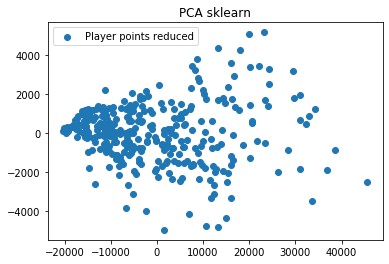

In [8]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Player points reduced')
plt.title("PCA sklearn")
plt.legend()
plt.show()

[[-12874.22365496    137.98940247]
 [ 10641.20540032   -223.61952794]
 [ -2296.06323825   -203.11417867]
 [ 27456.7532685     836.2717389 ]]
[0. 0. 2. 3. 2. 2. 1. 2. 0. 0. 1. 0. 0. 0. 2. 0. 0. 0. 2. 2. 1. 0. 3. 1.
 0. 0. 0. 1. 2. 0. 0. 1. 1. 2. 1. 3. 1. 2. 1. 1. 0. 2. 3. 2. 1. 2. 0. 2.
 2. 2. 0. 1. 1. 1. 2. 1. 2. 0. 0. 2. 3. 3. 2. 2. 1. 0. 0. 2. 1. 2. 2. 0.
 2. 1. 1. 1. 2. 0. 3. 0. 0. 0. 0. 0. 3. 1. 1. 2. 1. 0. 2. 0. 1. 0. 0. 2.
 0. 0. 0. 2. 0. 1. 0. 2. 2. 1. 2. 1. 0. 3. 1. 2. 1. 3. 0. 2. 3. 1. 1. 2.
 2. 1. 0. 3. 2. 1. 2. 0. 1. 2. 0. 0. 2. 0. 3. 1. 2. 2. 0. 2. 0. 1. 3. 2.
 2. 0. 2. 1. 2. 3. 1. 2. 1. 0. 2. 0. 0. 0. 1. 2. 2. 1. 3. 2. 2. 1. 0. 2.
 1. 2. 0. 0. 0. 0. 2. 1. 0. 1. 3. 0. 3. 1. 1. 0. 1. 0. 2. 2. 0. 1. 0. 2.
 0. 1. 1. 1. 0. 2. 0. 0. 0. 3. 1. 0. 2. 2. 0. 2. 0. 2. 0. 1. 2. 2. 2. 2.
 2. 2. 0. 0. 1. 1. 0. 2. 1. 1. 0. 2. 2. 1. 1. 0. 3. 0. 3. 0. 2. 0. 0. 1.
 1. 2. 2. 1. 2. 0. 2. 0. 0. 1. 2. 2. 1. 0. 0. 3. 2. 1. 0. 2. 0. 0. 2. 2.
 3. 3. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 2. 2. 1. 1. 1. 2. 3

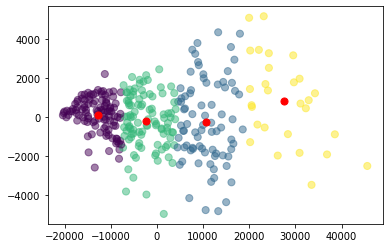

In [9]:
cluster_num = 4


df = pd.DataFrame(reduced_data,columns=['x','y'])

kmeans = KMeans(n_clusters=cluster_num).fit(df)

centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_.astype(float))

plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.5009743425060342
For n_clusters = 3 The average silhouette_score is : 0.5009743425060342
For n_clusters = 4 The average silhouette_score is : 0.5009743425060342
For n_clusters = 5 The average silhouette_score is : 0.5009743425060342
For n_clusters = 6 The average silhouette_score is : 0.5009743425060342
For n_clusters = 7 The average silhouette_score is : 0.5009743425060342
For n_clusters = 8 The average silhouette_score is : 0.5009743425060342
For n_clusters = 9 The average silhouette_score is : 0.5009743425060342
For n_clusters = 10 The average silhouette_score is : 0.5009743425060342


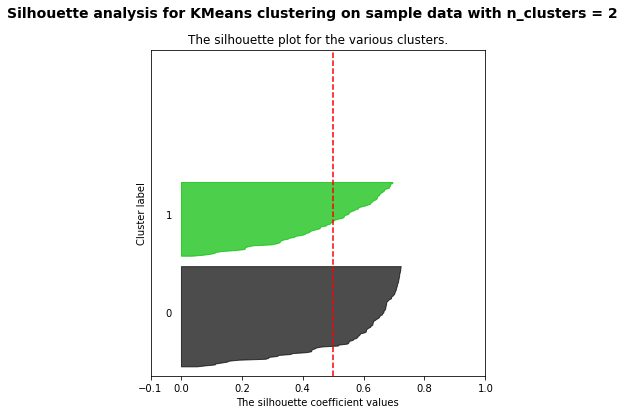

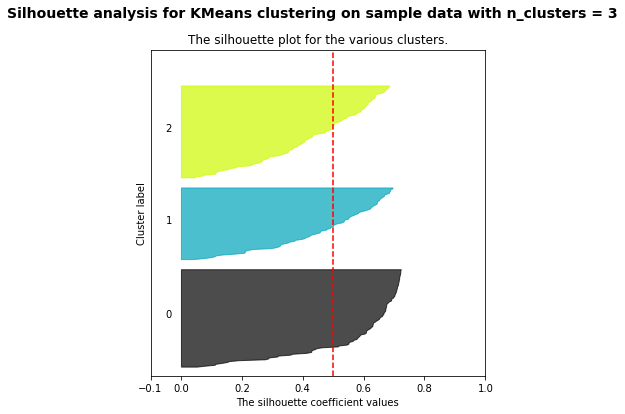

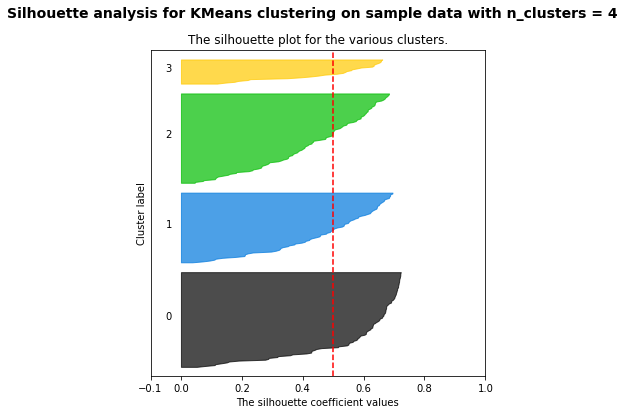

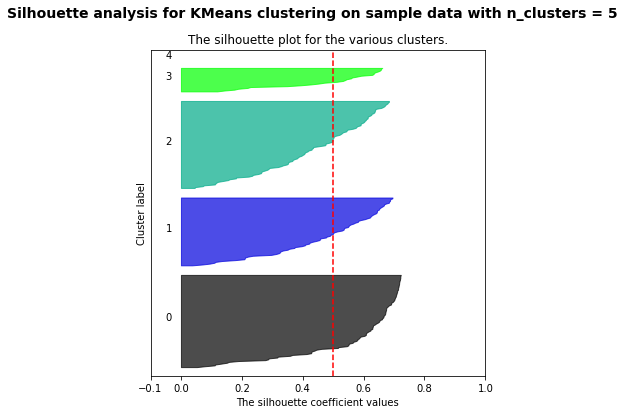

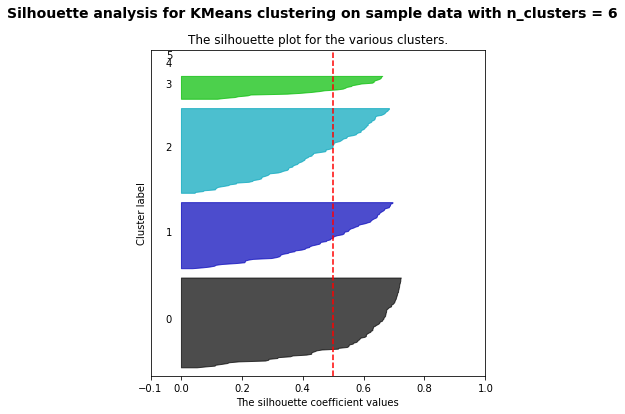

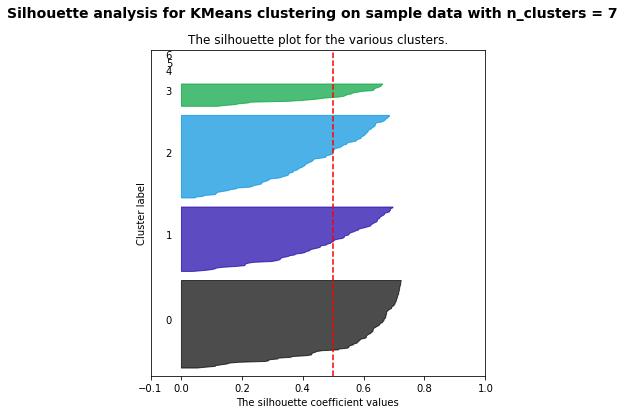

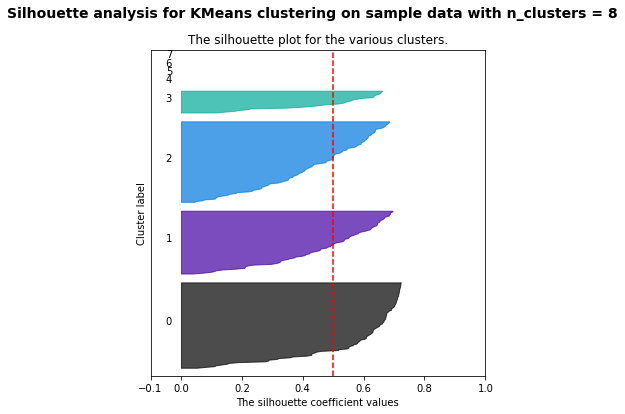

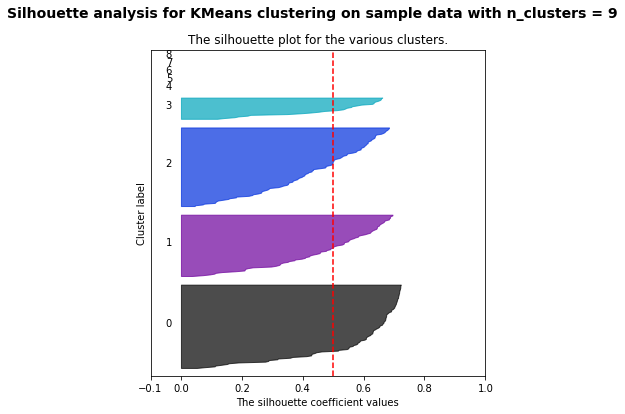

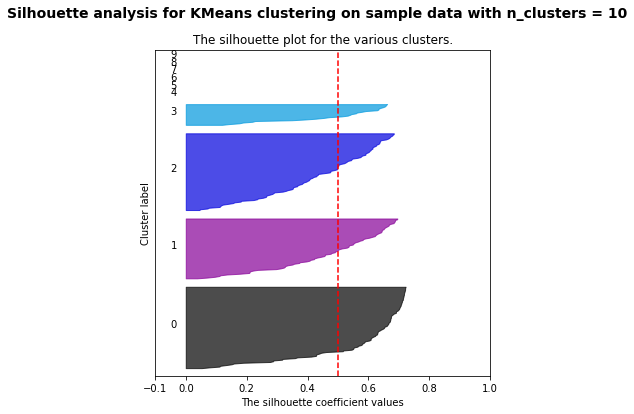

In [16]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(6, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.labels_.astype(float)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)

    print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(df[:, 0], df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [11]:
clusters = pd.DataFrame(kmeans.labels_)
player_names["cluster"] = clusters
player_names["x"] = df['x']
player_names["y"] = df['y']
player_names['Player'] = player_names['Player'].str.split('\\').str[0]
player_names.to_csv("data/groupings_all_2019.csv")